In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("wine.csv")

In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc = StandardScaler()

In [8]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
X_train[:5]

array([[ 0.87668336,  0.79842885,  0.64412971,  0.12974277,  0.48853231,
        -0.70326216, -1.42846826,  1.0724566 , -1.36820277,  0.35193216,
         0.0290166 , -1.06412236, -0.2059076 ],
       [-0.36659076, -0.7581304 , -0.39779858,  0.33380024, -1.41302392,
        -1.44153145, -0.5029981 ,  1.70109989,  0.02366802, -0.84114577,
         0.0290166 , -0.73083231, -0.81704676],
       [-1.69689407, -0.34424759, -0.32337513, -0.45327855, -0.14531976,
         1.24904997,  0.31964204, -1.52069698, -0.4346309 , -0.75682931,
         0.90197362,  0.51900537, -1.31256499],
       [ 0.51613387,  1.38326325,  0.42085937,  1.00427477,  0.13639227,
        -0.75248011, -1.23309123,  0.52239372, -0.33278669,  0.95057904,
        -1.10582753, -1.42518658,  0.02533424],
       [ 0.64046128, -0.50620174,  0.90461179,  0.12974277, -0.28617578,
         0.44515674,  0.67954711, -0.65631245,  0.09156415, -0.64300209,
         0.72738222,  1.7132947 ,  0.33916246]])

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [11]:
lda = LDA(n_components = 2)

In [12]:
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [13]:
X_train[:5]

array([[ 3.57315552,  1.94018924],
       [ 0.85475898, -2.08182977],
       [ 0.62173655, -3.06234453],
       [ 4.80786412,  2.00638739],
       [-3.8579759 ,  0.14987256]])

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model = LogisticRegression()

In [16]:
model.fit(X_test, y_test)

C:\Users\jaide\Anaconda3\envs\MLAI\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jaide\Anaconda3\envs\MLAI\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
y_pred = model.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
cm = confusion_matrix(y_test, y_pred)

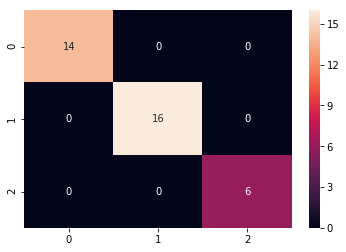

In [20]:
sns.heatmap(cm, annot = True)

In [21]:
from matplotlib.colors import ListedColormap

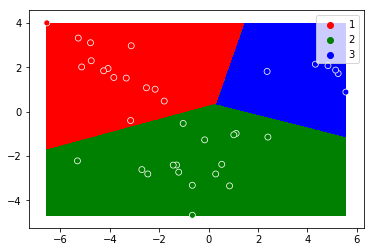

In [22]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(X_set[:, 0].min(), X_set[:, 0].max(), 0.01),
                    np.arange(X_set[:, 1].min(), X_set[:, 1].max(), 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
            cmap = ListedColormap(["red", "green", "blue"]))
sns.scatterplot(X_set[:, 0], X_set[:, 1], palette = {1 :"red", 2 : "green", 3: "blue"}, hue = y_set)

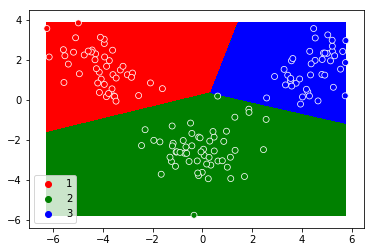

In [26]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(X_set[:, 0].min(), X_set[:, 0].max(), 0.01),
                    np.arange(X_set[:, 1].min(), X_set[:, 1].max(), 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
            cmap = ListedColormap(["red", "green", "blue"]))
sns.scatterplot(X_set[:, 0], X_set[:, 1], palette = {1 :"red", 2 : "green", 3: "blue"}, hue = y_set)